In [ ]:
!nvidia-smi

Sat Dec  9 13:52:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/3/

/content/drive/.shortcut-targets-by-id/1gnQwmuK5sB91otJm5R6gCVtkLL1yzPA0/3


In [ ]:
! nvcc -o ex1.out ex1.cu

In [ ]:
! ./ex1.out 257864 1024

The input length is 257864
the result are equal with the reference

Text(0, 0.5, 'Count')

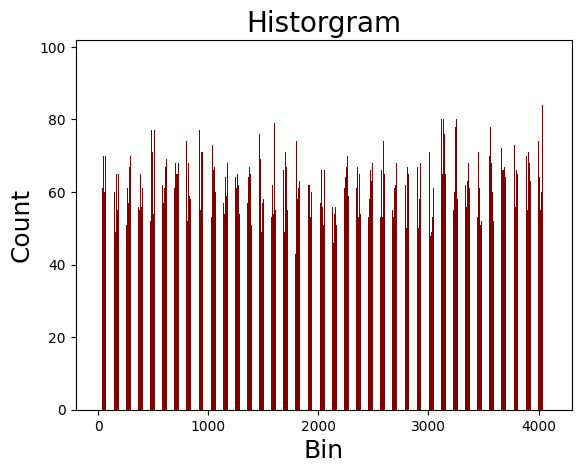

In [ ]:
resultRef = []
hostBins = []
with open('/content/drive/MyDrive/3/ex3.txt', 'r') as f:
  lines = f.readlines()
  for line in lines:
    resultRef.append(int(line.split(',')[0].split('= ')[-1]))
    hostBins.append(int(line.split(',')[1].split('= ')[-1]))

import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(start=1, stop=4097, step=1), resultRef, color ='maroon', width = 0.4)
plt.title('Historgram', fontsize=20)
plt.xlabel('Bin', fontsize=18)
plt.ylabel('Count', fontsize=18)

Text(0, 0.5, 'Number')

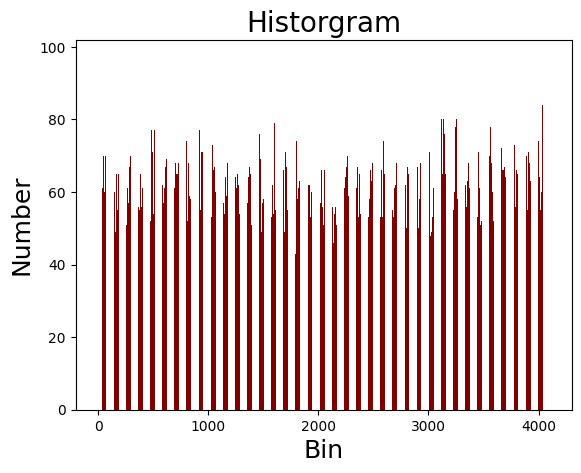

In [ ]:
plt.bar(np.arange(start=1, stop=4097, step=1), hostBins, color ='maroon', width = 0.4)
plt.title('Historgram', fontsize=20)
plt.xlabel('Bin', fontsize=18)
plt.ylabel('Number', fontsize=18)

In [ ]:
! ncu -o profile ./ex1.out 1024 64

The input length is 1024
==PROF== Connected to process 4892 (/content/drive/.shortcut-targets-by-id/1gnQwmuK5sB91otJm5R6gCVtkLL1yzPA0/3/ex1.out)
==PROF== Profiling "histogram_kernel" - 0: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 1: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 4892
the result are equal with the reference==PROF== Report: /content/drive/.shortcut-targets-by-id/1gnQwmuK5sB91otJm5R6gCVtkLL1yzPA0/3/profile.ncu-rep


In [ ]:
! ncu -i /content/drive/MyDrive/3/profile.ncu-rep --page details

[4892] ex1.out@127.0.0.1
  histogram_kernel(unsigned int *, unsigned int *, unsigned int, unsigned int), 2023-Dec-09 15:12:15, Context 1, Stream 7
    Section: GPU Speed Of Light Throughput
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.99
    SM Frequency                                                             cycle/usecond                         583.95
    Elapsed Cycles                                                                   cycle                         78,109
    Memory [%]                                                                           %                           6.30
    DRAM Throughput                                                                      %                           0.09
    Duration                                                                  